In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Uploading the dataset from google drive

In [2]:
!pip install -U -q PyDrive 
  
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
  
# Authenticate and create the PyDrive client. 
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [3]:
link = 'https://drive.google.com/file/d/1OR6d1K25ZInNoky-GLpGnxzmTcqPEfQG/view?usp=sharing'
  
import pandas as pd 
  
# to get the id part of the file 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('globalterrorismdb_0718dist.csv')   
  
df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1') 


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [157]:
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1.970000e+11,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,1.970000e+11,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,13,Unknown,NaN,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,1.970010e+11,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,1.970010e+11,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,1.970010e+11,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,8,Incendiary,NaN,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1


#checking the features

In [5]:
for item in df.columns:
  print(item)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

In [6]:
df.isnull().sum() #checking total null values

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [7]:
a=df.isnull().sum()/len(df)*100

In [8]:
#taking only those features which has less than 30% null values
variables=df.columns
variable=[]
for i in range(len(variables)):
  if a[i]<30:
    variable.append(variables[i])

In [9]:
variable

['eventid',
 'iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'gname',
 'guncertain1',
 'individual',
 'weaptype1',
 'weaptype1_txt',
 'weapsubtype1',
 'weapsubtype1_txt',
 'nkill',
 'nwound',
 'property',
 'ishostkid',
 'dbsource',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

In [10]:
df=df.loc[:,variable] #selecting the filtered features

In [11]:
df.property

0         0
1         0
2         0
3         1
4         1
         ..
181686   -9
181687    1
181688    1
181689   -9
181690    0
Name: property, Length: 181691, dtype: int64

In [12]:
df.shape

(181691, 48)

In [13]:
#Dropping columns where more than 160000 records are empty for final filtering
data_new = df.dropna(thresh=160000,axis=1)

In [14]:
data_new.shape

(181691, 47)

In [15]:
data_new.columns #checking the remaining columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [16]:
data_new.dropna(inplace=True)#dropping Nan values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
data_new.shape

(134042, 47)

In [18]:
data_new.head() #final cleaned dataframe

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
5,1.970010e+11,1970,1,1,0,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,1,1,1,0.0,0.0,1,0,2,Armed Assault,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Headquarters,217.0,United States,Black Nationalists,0.0,0,5,Firearms,5.0,Unknown Gun Type,0.0,0.0,1,0.0,Hewitt Project,-9,-9,0,-9
6,1.970010e+11,1970,1,2,0,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,1,1,1,0.0,0.0,0,0,1,Assassination,3,Police,25.0,Police Security Forces/Officers,Juan Maria de Lucah/Chief of Directorate of in...,218.0,Uruguay,Tupamaros (Uruguay),0.0,0,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,0.0,0.0,0,0.0,PGIS,0,0,0,0
7,1.970010e+11,1970,1,2,0,217,United States,1,North America,California,Oakland,37.791927,-122.225906,1.0,0,1,1,1,1.0,0.0,1,0,3,Bombing/Explosion,21,Utilities,107.0,Electricity,Edes Substation,217.0,United States,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,0.0,0.0,1,0.0,Hewitt Project,-9,-9,0,-9
8,1.970010e+11,1970,1,2,0,217,United States,1,North America,Wisconsin,Madison,43.076592,-89.412488,1.0,0,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,4,Military,28.0,Military Recruiting Station/Academy,"R.O.T.C. offices at University of Wisconsin, M...",217.0,United States,New Year's Gang,0.0,0,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,0.0,0.0,1,0.0,Hewitt Project,0,0,0,0
9,1.970010e+11,1970,1,3,0,217,United States,1,North America,Wisconsin,Madison,43.072950,-89.386694,1.0,0,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,2,Government (General),21.0,Government Building/Facility/Office,Selective Service Headquarters in Madison Wisc...,217.0,United States,New Year's Gang,0.0,0,8,Incendiary,20.0,Gasoline or Alcohol,0.0,0.0,1,0.0,Hewitt Project,0,0,0,0


#top 10 countries with highest no. of attacks

In [20]:
x=data_new["country_txt"].value_counts().index[:11]
y=data_new["country_txt"].value_counts().values[:11]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

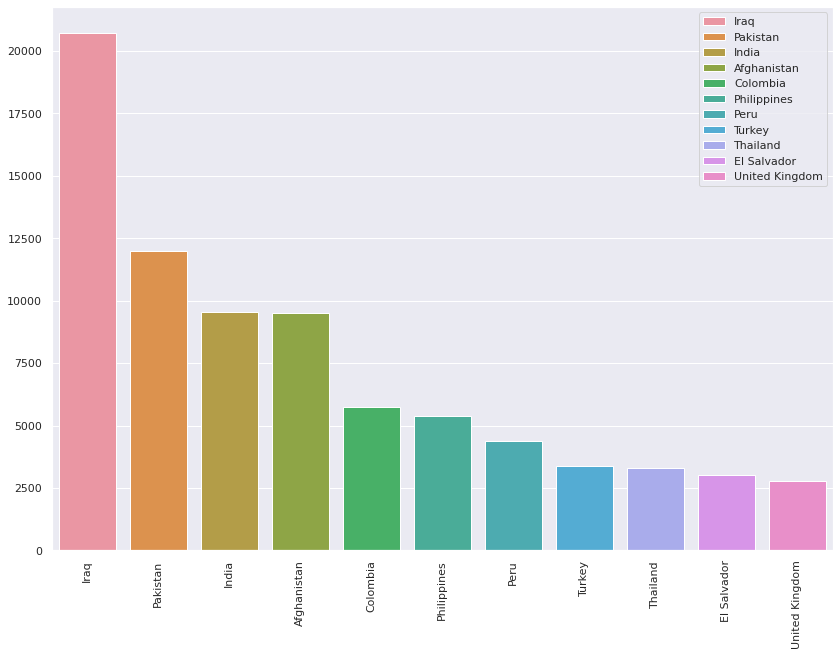

In [21]:
sns.set(rc={'figure.figsize':(14,10)})
sns.barplot(x,y,hue=x,dodge=False)
plt.xticks(rotation= 90)

#Most used weapon type

In [22]:
n=data_new["weaptype1_txt"].value_counts().values
m=data_new["weaptype1_txt"].value_counts().index

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

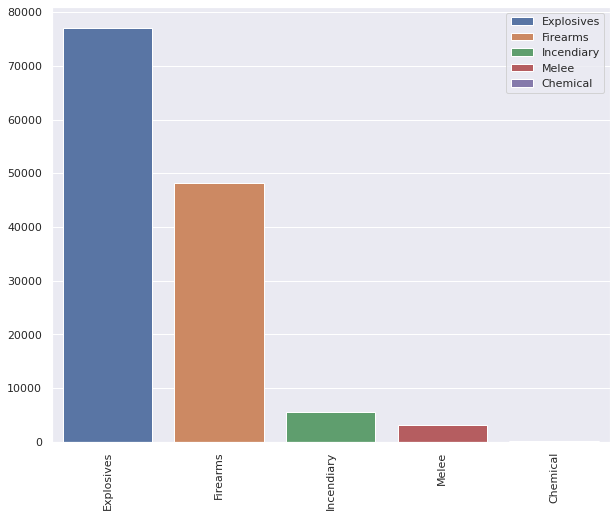

In [23]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(m,n,hue=m,dodge=False)
plt.xticks(rotation= 90)

#Most common attack type

In [24]:
a=data_new["attacktype1_txt"].value_counts().values
b=data_new["attacktype1_txt"].value_counts().index

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

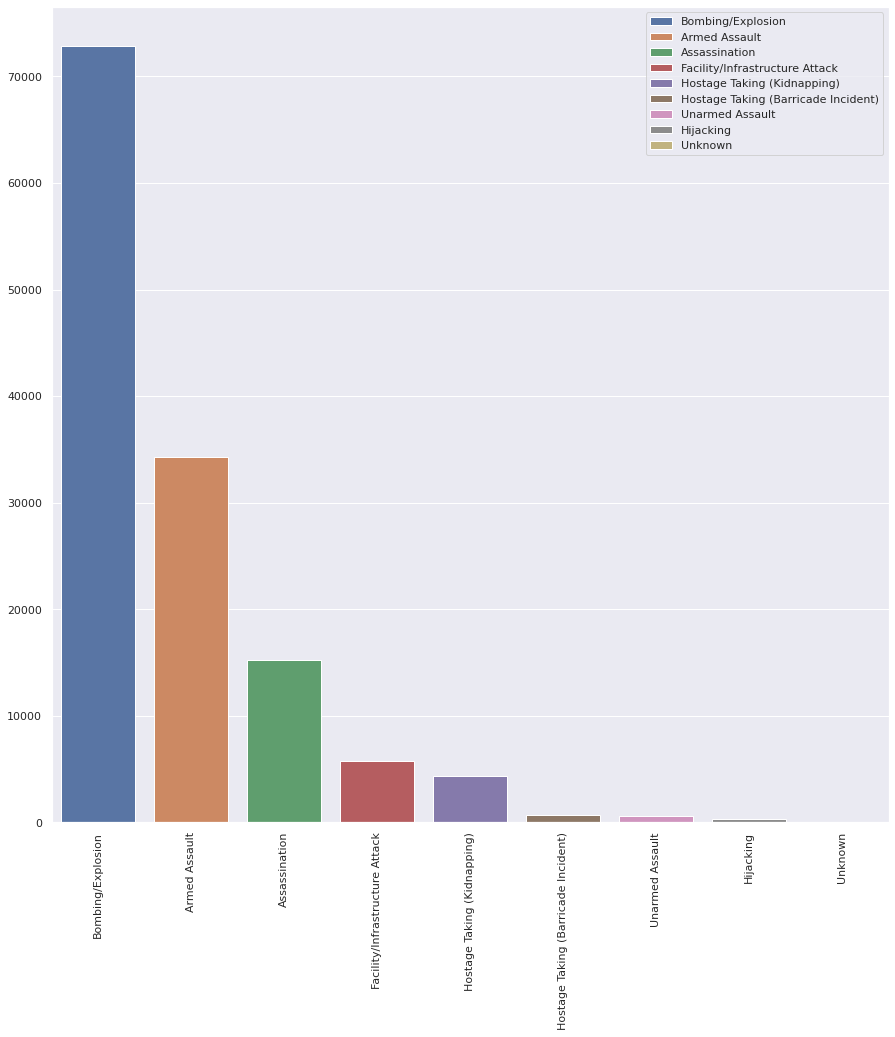

In [25]:
sns.set(rc={'figure.figsize':(15,15)})
sns.barplot(b,a,hue=b,dodge=False)
plt.xticks(rotation= 90)

#Most vulnerable targets

In [26]:
q=data_new["targtype1_txt"].value_counts().values
p=data_new["targtype1_txt"].value_counts().index

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

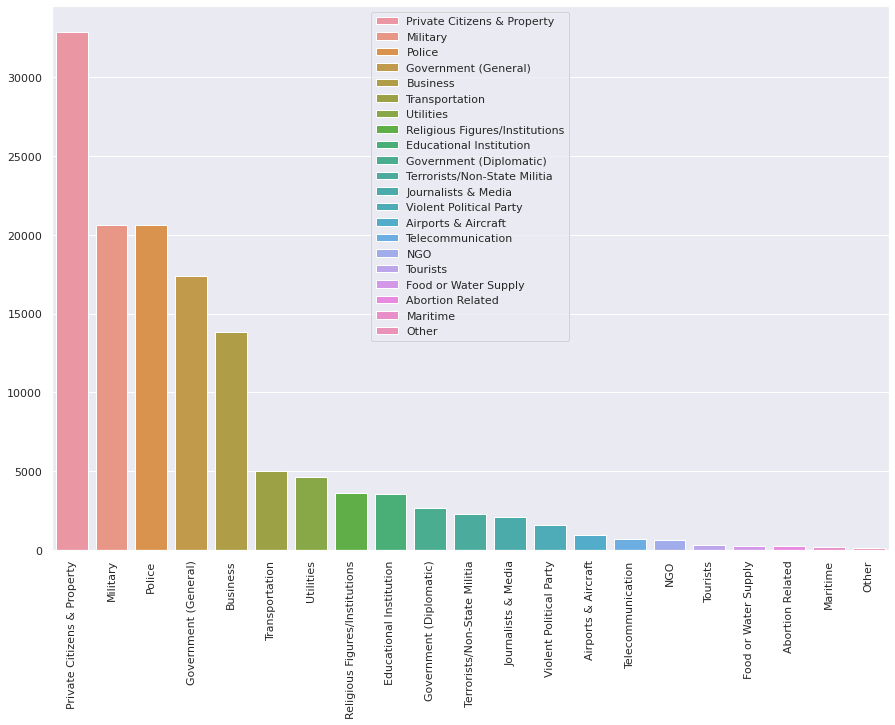

In [27]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(p,q,hue=p,dodge=False)
plt.xticks(rotation= 90)

#Countries where property was damaged maximum times

In [28]:
data_new=data_new[data_new.property!=-9]

In [29]:
data_new.property #property =-9 means the property damage is unknown

5         1
6         0
7         1
8         1
9         1
         ..
181683    0
181684    0
181685    1
181687    1
181688    1
Name: property, Length: 116982, dtype: int64

In [30]:
data_new.shape

(116982, 47)

In [31]:
group_c=data_new.groupby("country_txt")["property"]

In [32]:
l1=[]
l2=[]
df_=pd.DataFrame()
for g,gdata in group_c:
      l2.append(g)
      temp=group_c.get_group(g).sum()
      l1.append(temp)
df_["Country"]=l2
df_["Property_Damage"]=l1

In [33]:
df_.sort_values(by="Property_Damage",axis=0,ascending=False,inplace=True)

In [34]:
df_=df_[df_["Property_Damage"]!=0]

In [35]:
df_=df_.iloc[:30,:]

In [36]:
df_[df_["Property_Damage"]==df_["Property_Damage"].max()]

,Country,Property_Damage
80,Iraq,7762


In [37]:
df_

,Country,Property_Damage
80,Iraq,7762
130,Pakistan,6089
0,Afghanistan,4115
76,India,4061
33,Colombia,3652
135,Peru,3423
50,El Salvador,2603
136,Philippines,2330
179,Turkey,2146
162,Spain,1693


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

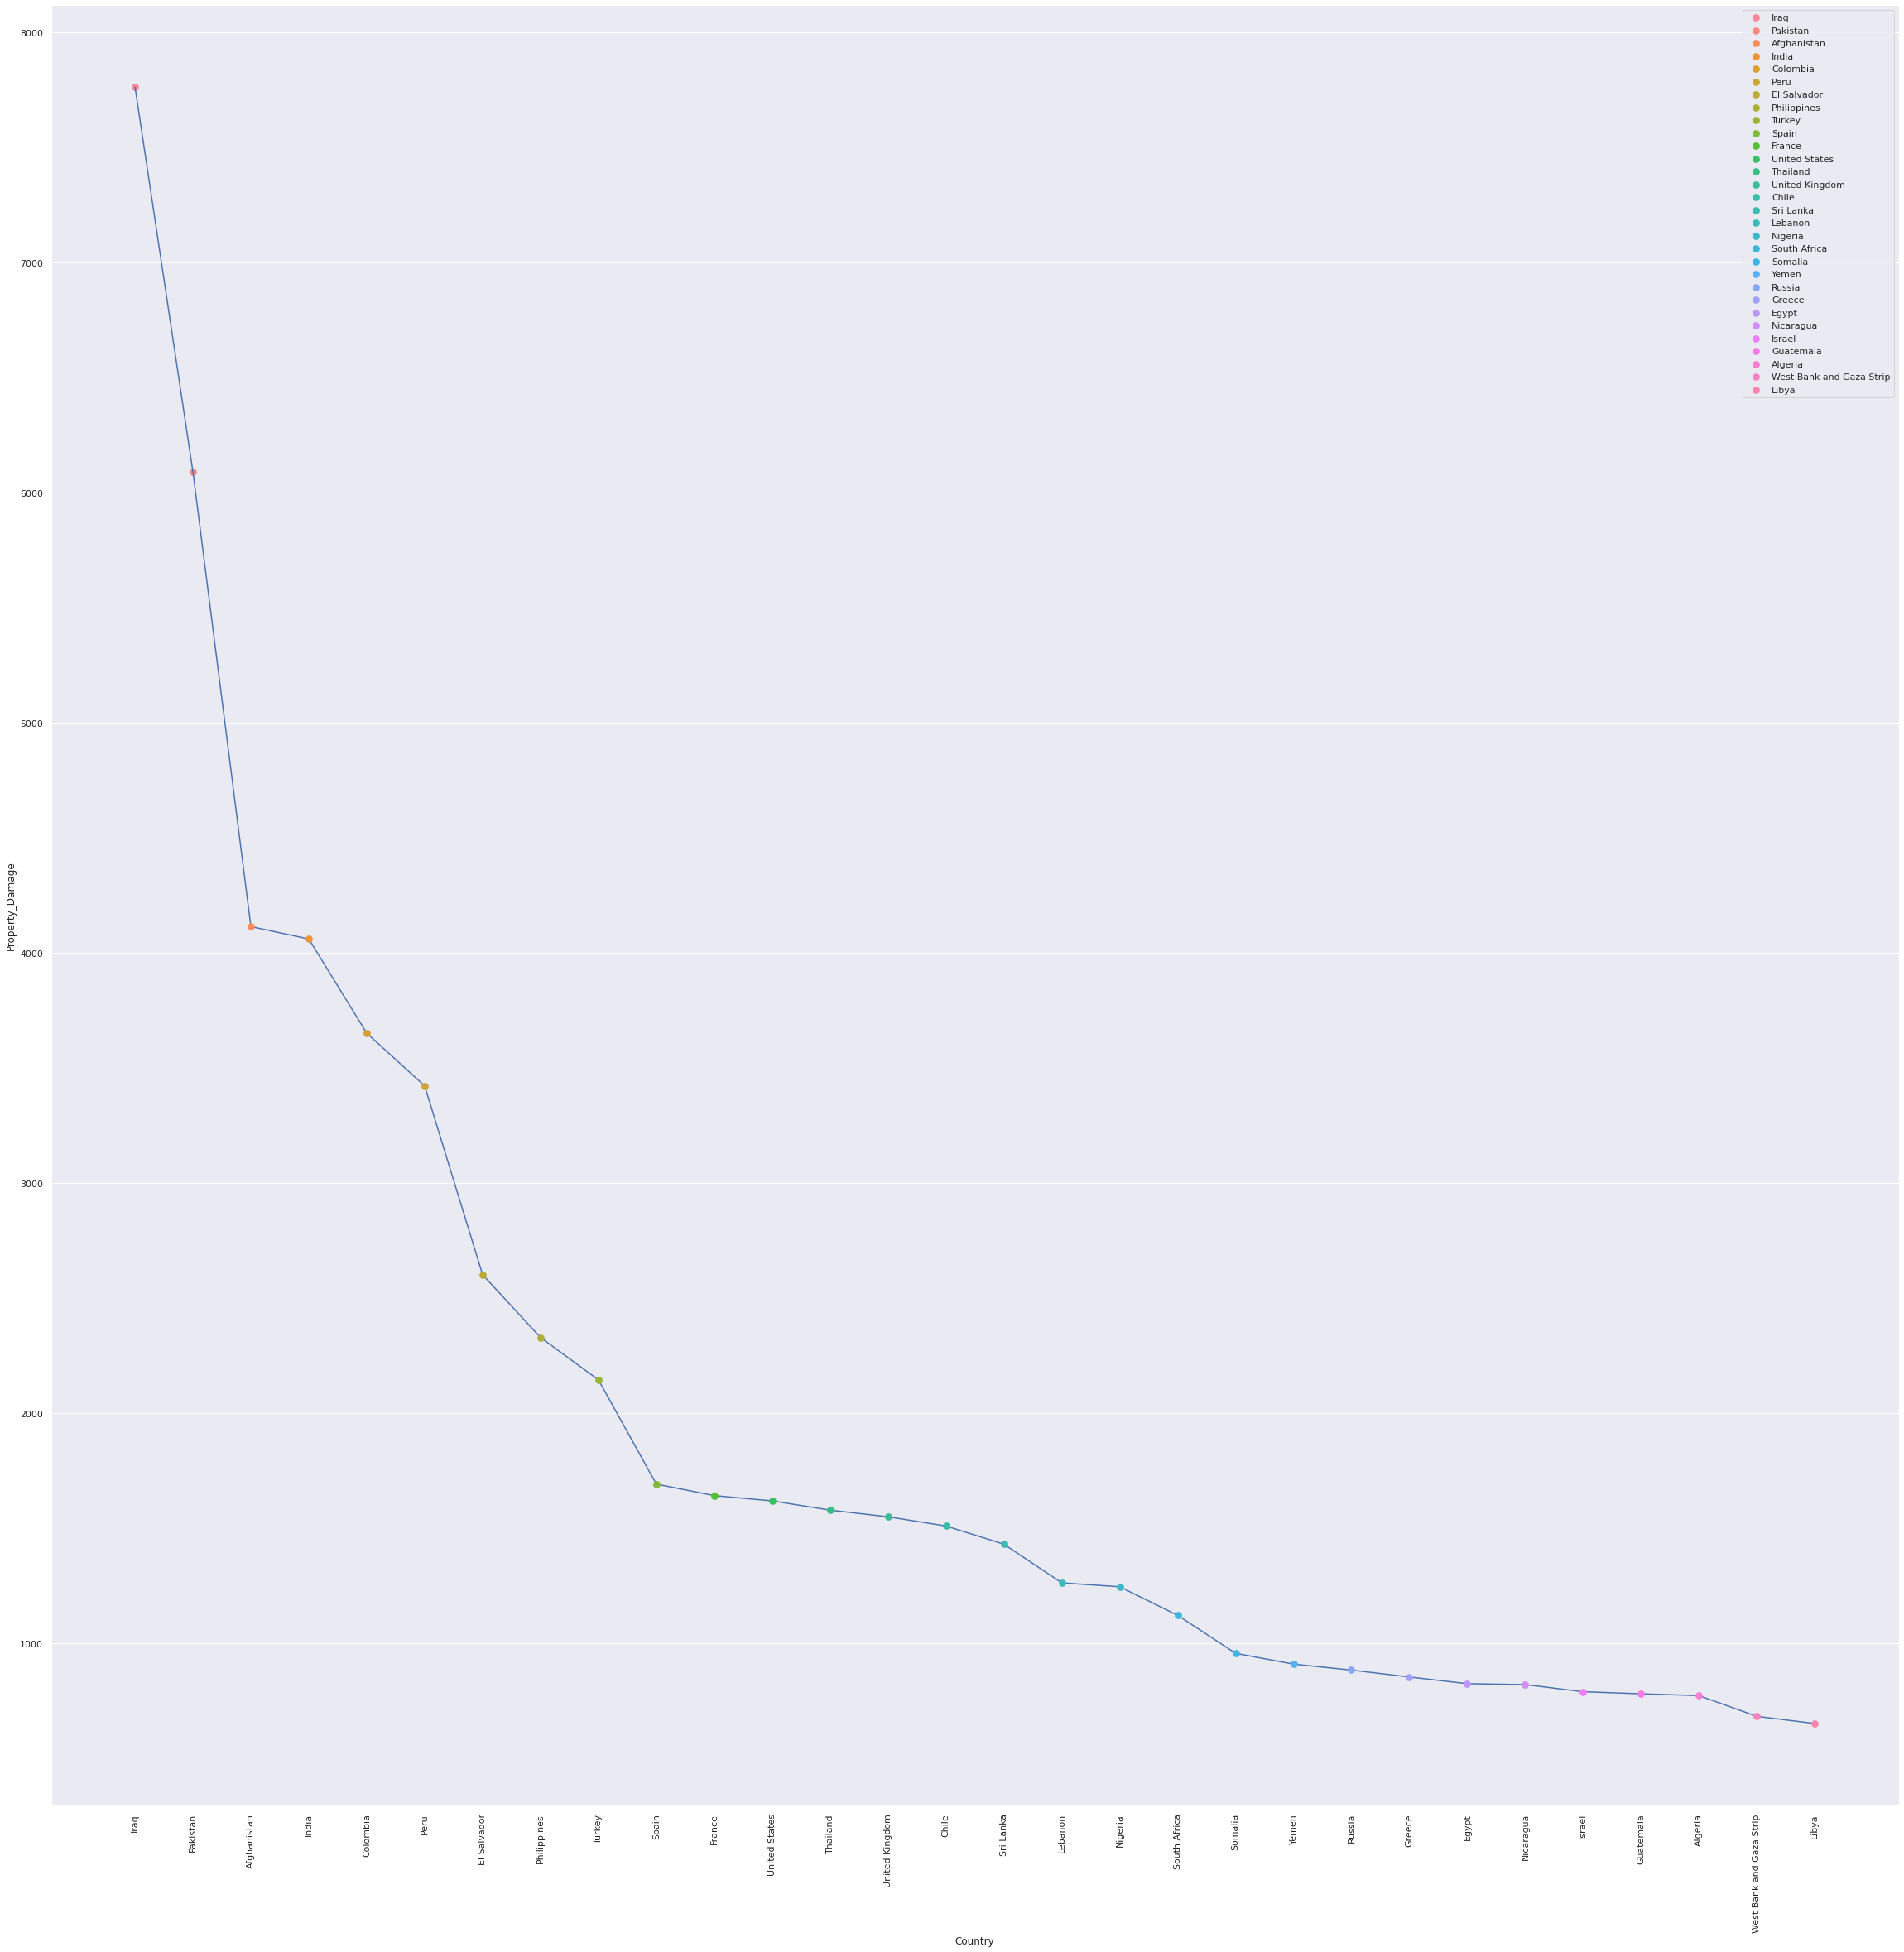

In [38]:
sns.set(rc={'figure.figsize':(40,40)})
sns.pointplot(df_["Country"],df_["Property_Damage"],hue=df_["Country"])
sns.lineplot(df_["Country"],df_["Property_Damage"])
plt.xticks(rotation= 90)

#Region where most people were killed

In [39]:
no_kill=data_new["nkill"]

In [40]:
group_region=data_new.groupby("region_txt",as_index=False)[["nkill"]].sum()
group_region.sort_values(by="nkill",axis=0,ascending=False,inplace=True)
group_region.rename(columns = {'region_txt':'Region','nkill':'Number of people killed'}, inplace = True) 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

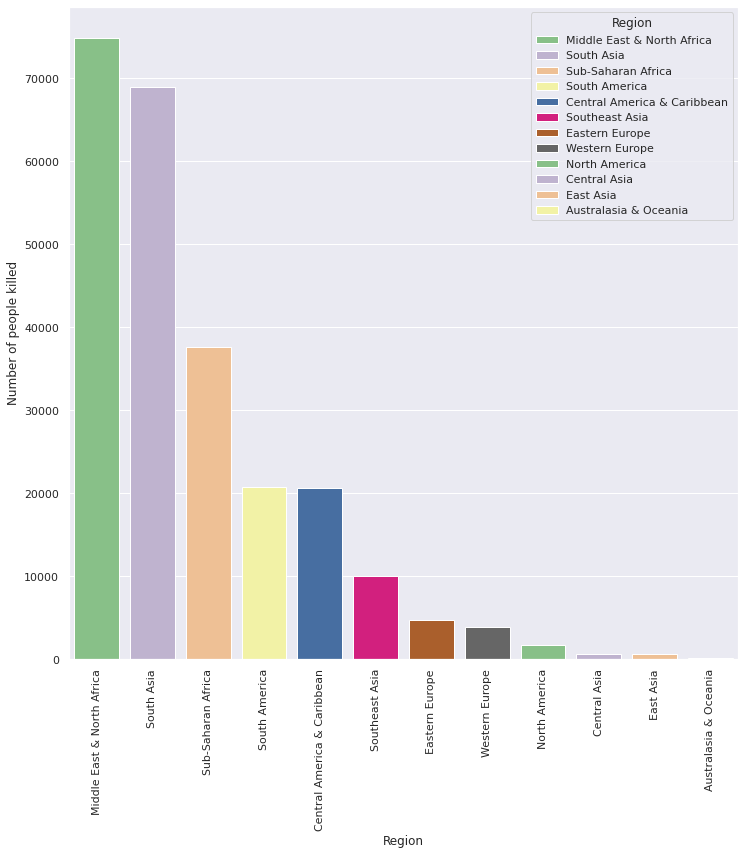

In [41]:
sns.set(rc={'figure.figsize':(12,12)})
sns.barplot(group_region["Region"],group_region["Number of people killed"],hue=group_region["Region"],palette="Accent",dodge=False)
plt.xticks(rotation=90)

#TOP 15 COUNTRIES WHERE THE ATTACK WAS EXTENDED FOR MORE THAN 24 HOURS

In [42]:
g=data_new.groupby("country_txt",as_index=False)["extended"].sum()

In [43]:
g.sort_values(by="extended",axis=0,ascending=False,inplace=True)
g.rename(columns = {'country_txt':'country name'}, inplace = True) 

In [44]:
g=g[g["extended"]!=0]

In [45]:
g=g.iloc[:15]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

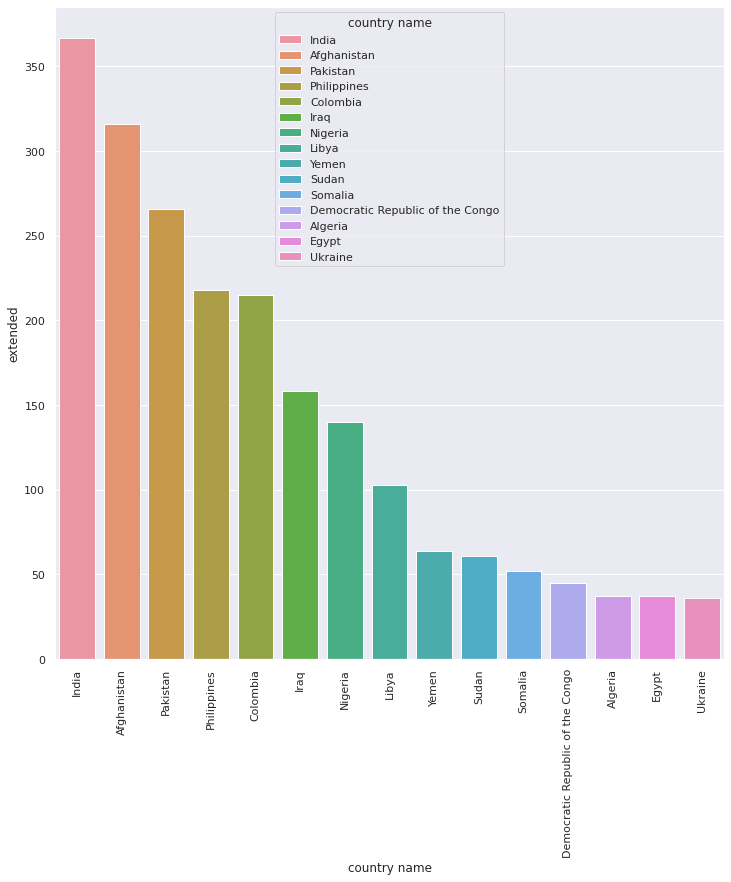

In [46]:
sns.barplot(g["country name"],g["extended"],hue=g["country name"],dodge=False)
plt.xticks(rotation=90)

#Top 10 most active Terrorist organisations

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


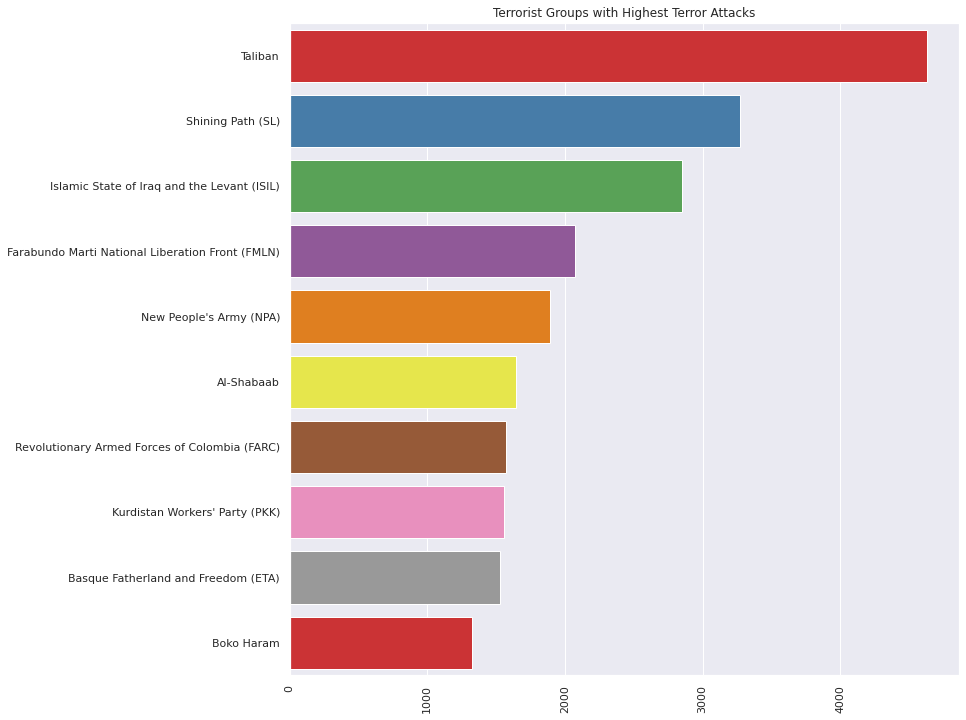

In [47]:
sns.barplot(data_new['gname'].value_counts()[1:11].values,data_new['gname'].value_counts()[1:11].index,palette='Set1')
plt.xticks(rotation=90)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

#People killed in attacks year wise

In [51]:
da=data_new.groupby("iyear",as_index=False).nkill.sum()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

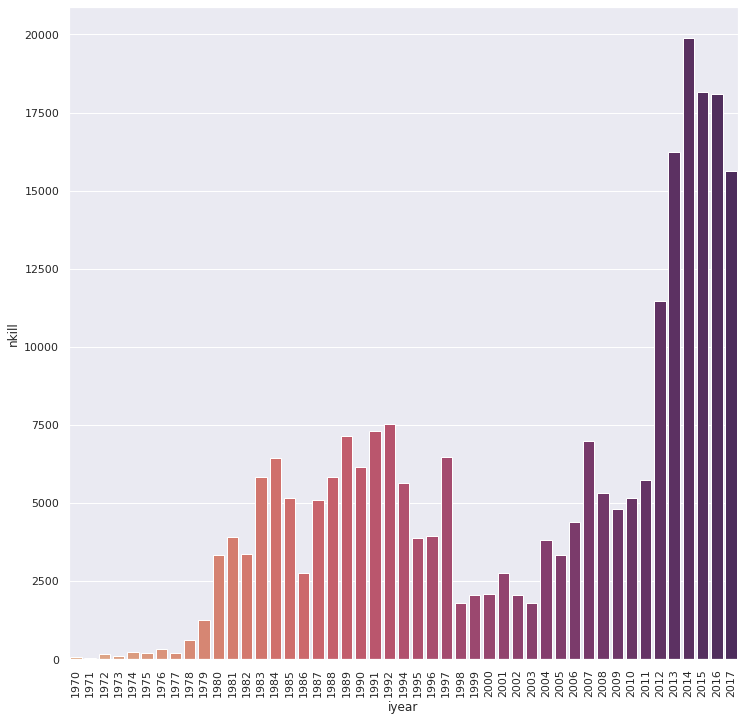

In [146]:
sns.barplot(x=da["iyear"],y=da["nkill"],palette="flare")
plt.xticks(rotation=90)

#Top 10 countries where most people were killed in terrorist attack

In [149]:
gc=data_new.groupby("country_txt",as_index=False).nkill.sum()
gc.sort_values(by="nkill",ascending=False,inplace=True)

In [ ]:
#color palette reference
#'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r',

In [150]:
gc=gc[:10]
gc

,country_txt,nkill
80,Iraq,42605.0
0,Afghanistan,24347.0
130,Pakistan,17852.0
76,India,13415.0
163,Sri Lanka,11455.0
33,Colombia,10220.0
50,El Salvador,9782.0
135,Peru,9555.0
126,Nigeria,8916.0
2,Algeria,6227.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


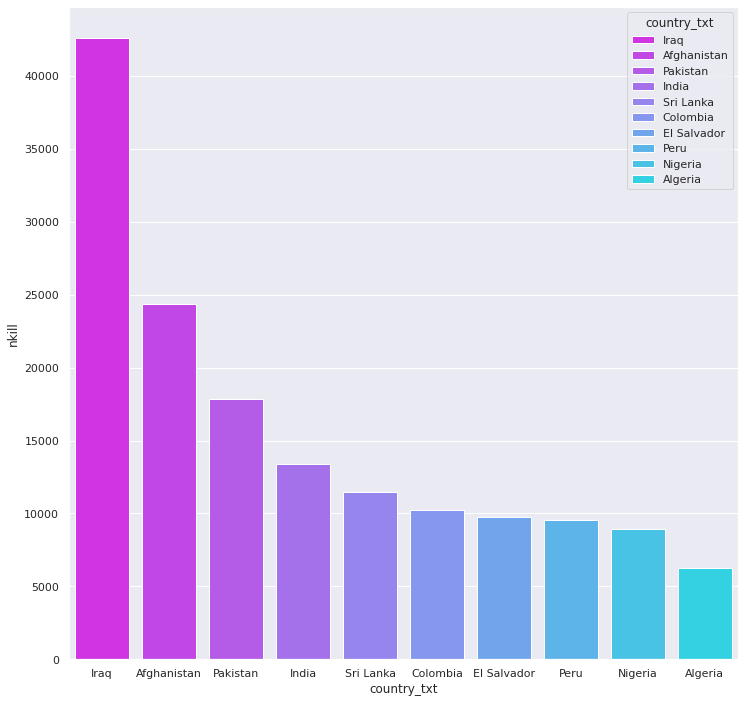

In [156]:
sns.barplot(gc["country_txt"],gc["nkill"],hue=gc["country_txt"],dodge=False,palette="cool_r")

#Total terror attacks year wise

In [53]:
attack=data_new.groupby("iyear",as_index=False).attacktype1_txt.count()
attack.rename(columns = {'attacktype1_txt':'Total Number Of Attacks'}, inplace = True) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

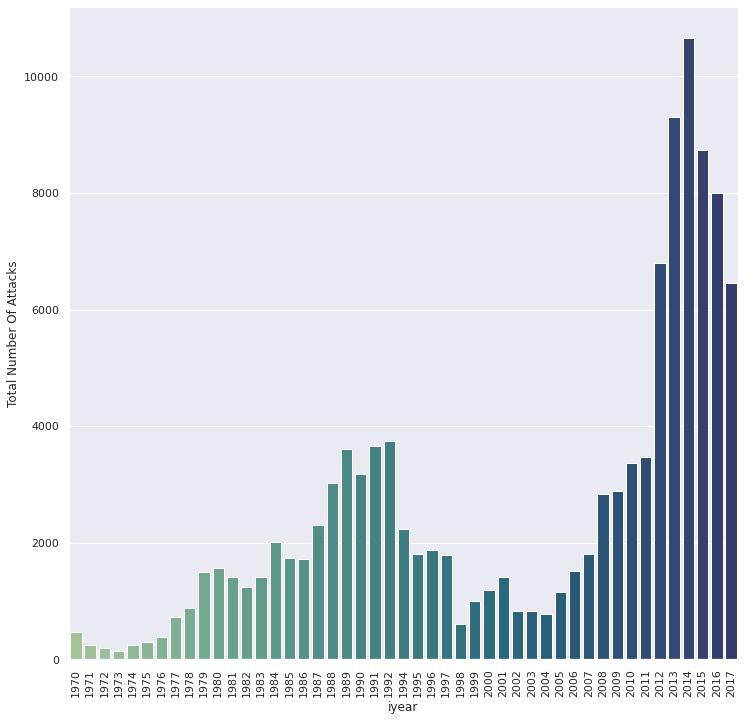

In [136]:
sns.barplot(x=attack["iyear"],y=attack["Total Number Of Attacks"],palette="crest")
plt.xticks(rotation=90)

In [90]:
attack[attack["Total Number Of Attacks"].values==attack["Total Number Of Attacks"].values.min()]

,iyear,Total Number Of Attacks
3,1973,134


In [92]:
attack[attack["Total Number Of Attacks"].values==attack["Total Number Of Attacks"].values.max()]

,iyear,Total Number Of Attacks
43,2014,10657
